## mnist digit recogniton 

In [1]:
import customnet as cn
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train.reshape((60000, 784)) / 255.0, x_test.reshape((10000, 784)) / 255.0
y_train_ohv, y_test_ohv = np.zeros((60000, 10)), np.zeros((10000, 10))

for i in range(60000):
    y_train_ohv[i][y_train[i]] = 1
for i in range(10000):
    y_test_ohv[i][y_test[i]] = 1

In [3]:
def mnist_accuracy(model):
    count_test = 0
    for i in range(10000):
        test_out = model.forward(x_test[i])
        test_pred = np.argmax(test_out)
        count_test += int(test_pred == y_test[i])
    print(f'test acc - {(count_test / 10000) * 100} %')

## set 1

In [4]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:60000], 
    y_train_ohv[:60000],
    batch_size=10,
    loss_fn='ce',
    alpha=1e-1,
    beta=0.99,
    epochs=200)

mnist_accuracy(model) 

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [2:16:06<00:00, 40.83s/it]


test acc - 96.91 %


## set 2

In [5]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-10, 1e-9])

model.momentum(
    x_train[:1000], 
    y_train_ohv[:1000],
    batch_size=10,
    loss_fn='ce',
    alpha=1e-1,
    beta=0.99,
    epochs=5000)

mnist_accuracy(model) 

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [55:57<00:00,  1.49it/s]


test acc - 83.97 %


## set 3

In [6]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:10000], 
    y_train_ohv[:10000],
    batch_size=10,
    loss_fn='ce',
    alpha=1e-1,
    beta=0.99,
    epochs=1000)

mnist_accuracy(model) 

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:04:00<00:00,  7.44s/it]


test acc - 94.46 %


## set 4

In [7]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:1000], 
    y_train_ohv[:1000],
    batch_size=10,
    loss_fn='ce',
    alpha=1e-1,
    beta=0.99,
    epochs=5000)

mnist_accuracy(model) 

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [58:27<00:00,  1.43it/s]


test acc - 86.1 %


## after normalization

In [8]:
from tensorflow.keras.utils import normalize
x_train, x_test = normalize(x_train), normalize(x_test)

In [9]:
def mnist_accuracy(model):
    count_test = 0
    for i in range(10000):
        test_out = model.forward(x_test[i])
        test_pred = np.argmax(test_out)
        count_test += int(test_pred == y_test[i])
    print(f'test acc - {(count_test / 10000) * 100} %')

## set 1

In [11]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:60000], 
    y_train_ohv[:60000],
    batch_size=10,
    loss_fn='ce',
    alpha=2e-1,
    beta=0.99,
    epochs=100)

mnist_accuracy(model) 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:23:53<00:00, 50.33s/it]


test acc - 96.96000000000001 %


## set 2

In [12]:
model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:60000], 
    y_train_ohv[:60000],
    batch_size=10,
    loss_fn='ce',
    alpha=8e-1,
    beta=0.99,
    epochs=25)

mnist_accuracy(model) 

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [19:14<00:00, 46.18s/it]


test acc - 17.849999999999998 %


## set 3

In [13]:
import matplotlib.pyplot as plt

model = cn.Model([784, 64, 64, 10], ['sigmoid', 'sigmoid', 'sigmoid'], [1e-9, 1e-8])

model.momentum(
    x_train[:60000], 
    y_train_ohv[:60000],
    batch_size=10,
    loss_fn='ce',
    alpha=2e-1,
    beta=0.99,
    epochs=200)

mnist_accuracy(model)

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [2:42:33<00:00, 48.77s/it]


test acc - 97.33000000000001 %


## error plot

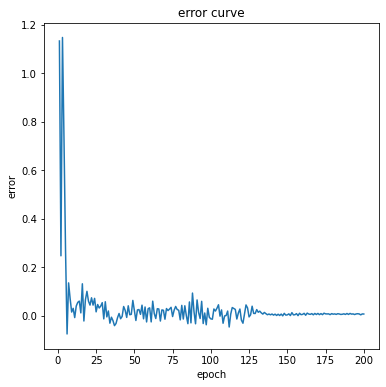

In [14]:
# error plot of best model
model.plot(epochs=200, plt_size=[6, 6])